In [13]:
from ffipy import FFIEC_Client
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
failed_banks = pd.read_csv('data/failed_banks_dataset.csv')
len(failed_banks)

556

In [5]:
failed_banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 7 columns):
Bank Name                556 non-null object
City                     556 non-null object
ST                       556 non-null object
CERT                     556 non-null int64
Acquiring Institution    556 non-null object
Closing Date             556 non-null object
Updated Date             556 non-null object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB


In [229]:
failed_banks['Date'] = pd.to_datetime(failed_banks['Closing Date'])
failed_banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 8 columns):
Bank Name                556 non-null object
City                     556 non-null object
ST                       556 non-null object
CERT                     556 non-null int64
Acquiring Institution    556 non-null object
Closing Date             556 non-null object
Updated Date             556 non-null object
Date                     556 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 34.8+ KB


In [230]:
failed_banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,Date
0,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.",31-May-19,22-Aug-19,2019-05-31
1,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,24-Jul-19,2017-12-15
2,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,12-Aug-19,2017-10-13
3,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,29-Jan-19,2017-05-26
4,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,22-Mar-18,2017-05-05


In [231]:
# Insert missing years when failed_banks == 0
failed_banks.groupby(failed_banks.Date.dt.year)['Bank Name'].count()

Date
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
2019      1
Name: Bank Name, dtype: int64

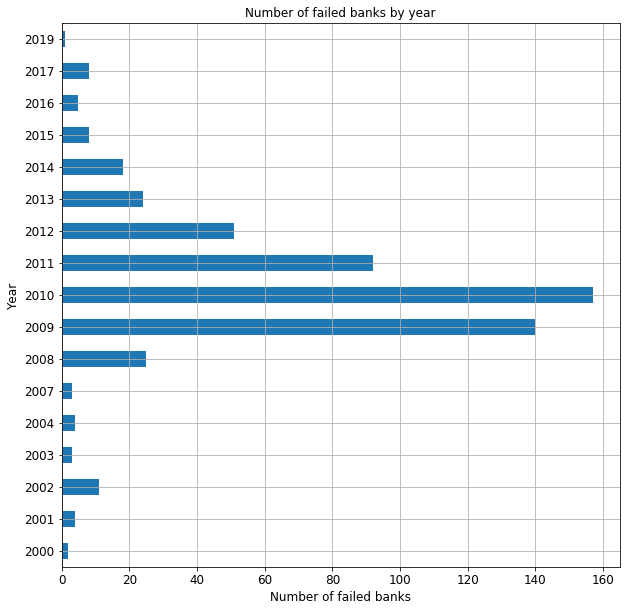

In [28]:
ax = failed_banks.groupby(failed_banks.Date.dt.year)['Bank Name'].count().plot(
    kind='barh', title ="Number of failed banks by year", figsize=(10, 10), legend=False, fontsize=12)
ax.grid()
ax.set_xlabel("Number of failed banks", fontsize=12)
ax.set_ylabel("Year", fontsize=12)
plt.show()

In [30]:
client = FFIEC_Client()
report_periods = client.retrieve_ubpr_reporting_periods()
len(report_periods)

67

In [76]:
#report_periods


In [219]:
#client = FFIEC_Client()
# get a list of RSSD codes for filers on all the periods, store in dictionary
filers_bydate_dict = {}
count_bydate_dict = {}
for period in report_periods:
    filers_bydate =  client.retrieve_filers_since_date(ds_name='Call', 
                                                      reporting_pd_end=period, last_update_date=period)
    filers_bydate_dict[period] = filers_bydate
    count_bydate_dict[period] = len(filers_bydate)
  


In [222]:
# TO DO - need to find a way to trace banks through time, drop all de novo (less than 5 years, i.e 20 reports)
core_banks = pd.DataFrame.from_dict(filers_bydate_dict, orient='index').T
core_banks.head(20)

,12/31/2002,3/31/2003,6/30/2003,9/30/2003,12/31/2003,3/31/2004,6/30/2004,9/30/2004,12/31/2004,3/31/2005,...,3/31/2017,6/30/2017,9/30/2017,12/31/2017,3/31/2018,6/30/2018,9/30/2018,12/31/2018,3/31/2019,6/30/2019
0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,1885848.0,37.0,...,175458.0,175458.0,688556.0,688556.0,688556.0,688556.0,175458.0,175458.0,175458.0,175458.0
1,242.0,242.0,242.0,242.0,242.0,242.0,242.0,242.0,1007417.0,242.0,...,774253.0,723158.0,774253.0,774253.0,1001451.0,3804535.0,382274.0,688556.0,715630.0,715630.0
2,279.0,279.0,279.0,279.0,279.0,279.0,279.0,279.0,2995904.0,279.0,...,1007734.0,688556.0,175458.0,1001451.0,715630.0,715630.0,688556.0,316859.0,688556.0,382274.0
3,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,561239.0,354.0,...,1001451.0,774253.0,854351.0,723158.0,175458.0,175458.0,715630.0,3020447.0,316859.0,774253.0
4,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,541035.0,439.0,...,954251.0,854351.0,3804535.0,3804535.0,774253.0,382274.0,856159.0,774253.0,868442.0,938354.0
5,457.0,457.0,457.0,457.0,457.0,457.0,457.0,457.0,827346.0,457.0,...,3804535.0,649342.0,723158.0,83236.0,3804535.0,1001451.0,156635.0,918150.0,236256.0,3020447.0
6,505.0,505.0,505.0,505.0,505.0,505.0,505.0,505.0,1216059.0,505.0,...,723158.0,715630.0,382274.0,236256.0,316859.0,137456.0,1005655.0,382274.0,382274.0,723158.0
7,1146.0,1146.0,1146.0,1146.0,1146.0,1146.0,1146.0,1146.0,76050.0,1146.0,...,316859.0,137456.0,715630.0,175458.0,918150.0,316859.0,981453.0,856159.0,803957.0,406666.0
8,1155.0,1155.0,1155.0,1155.0,1155.0,1155.0,1155.0,1155.0,779968.0,1155.0,...,359744.0,359744.0,92144.0,215653.0,359744.0,811747.0,1187551.0,630340.0,3020447.0,803957.0
9,1351.0,1351.0,1351.0,1351.0,1351.0,1351.0,1351.0,1351.0,491569.0,1351.0,...,92144.0,316859.0,2554.0,856159.0,3020447.0,359744.0,316859.0,597041.0,875655.0,868442.0


In [223]:
core_banks.to_csv('data/core_banks_dataset.csv', index=False)

In [193]:
import sys 
sys.getsizeof(filers_bydate_dict)

2280

In [192]:
sys.getsizeof(count_bydate_dict)

2280

In [188]:
bank_universe = pd.DataFrame.from_dict(count_bydate_dict, orient='index')
bank_universe['Date'] = bank_universe.index
bank_universe.Date = pd.to_datetime(bank_universe['Date'])
bank_universe.columns = ['Number of banks', 'Date']
bank_universe['Year'] = bank_universe.Date.dt.year
bank_universe.to_csv('data/bank_universe.csv', index=False)

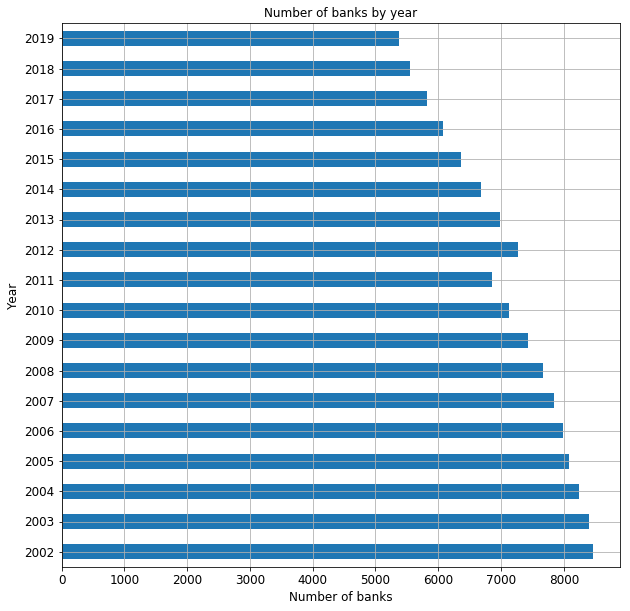

In [177]:
ax = bank_universe.groupby('Year')['Number of banks'].mean().plot(kind='barh',
                        title ="Number of banks by year", figsize=(10, 10), legend=False, fontsize=12)
ax.grid()
ax.set_xlabel("Number of banks", fontsize=12)
ax.set_ylabel("Year", fontsize=12)
plt.show()

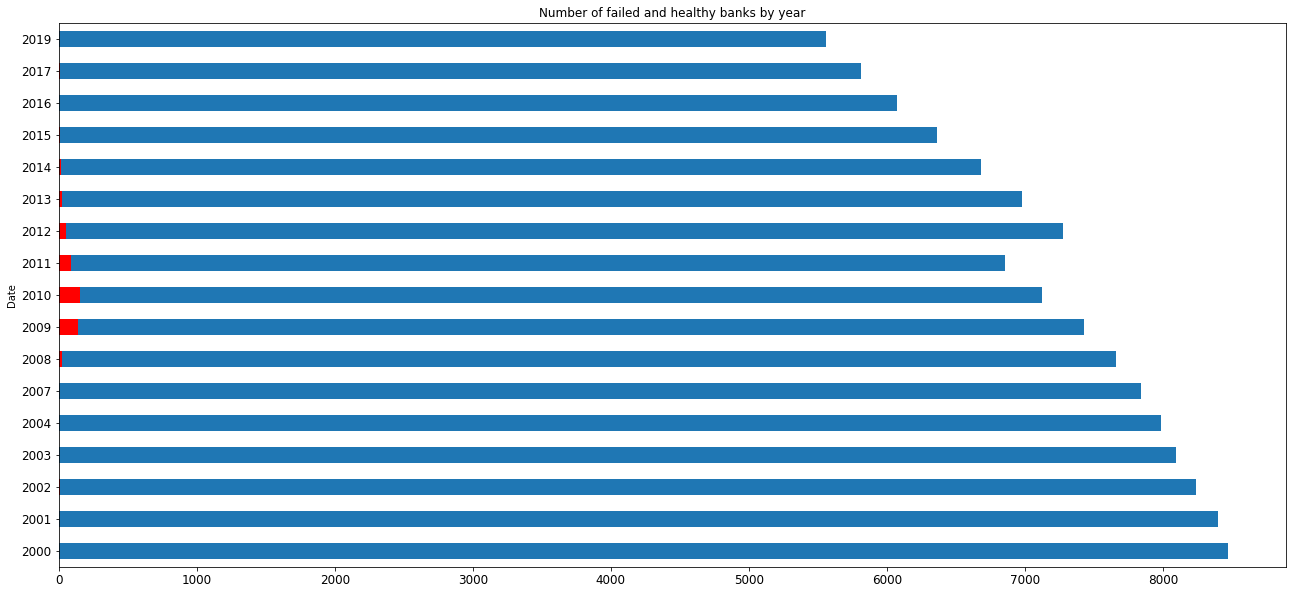

In [183]:
ax1 = bank_universe.groupby('Year')['Number of banks'].mean().plot(kind='barh',
                        title ="Number of banks by year", figsize=(10, 10), legend=False, fontsize=12)
ax2 = failed_banks.groupby(failed_banks.Date.dt.year)['Bank Name'].count().plot(
    kind='barh', title ="Number of failed and healthy banks by year", figsize=(22, 10), legend=False, color='red', fontsize=12)

ax.grid()
ax.set_xlabel("Number of banks", fontsize=12)
ax.set_ylabel("Year", fontsize=12)
plt.show()


In [234]:
# TO DO:  a new column "Last Report" use map function if Data < Report date 
failed_banks.Date.min()

Timestamp('2000-10-13 00:00:00')

In [206]:
# call report method
#client = FFIEC_Client()
ds_name = 'Call'    # Pull Call report data
end_date = '3/31/2003'  # Pull data in reporting pd ending 3/31/17
fiID_type = 'ID_RSSD'  # Type of financial inst identifier
fiID = 37   # Indentifier for Wyomin Bank and Trust
fmt = 'SDF'  # Pull report as PDF
# <facsimileFormat>PDF or XBRL or SDF</facsimileFormat>
outfile = 'test7.PDF'  # Output file path
return_result = True  # If True, method returns the data
f = client.retrieve_facsimile(ds_name=ds_name, reporting_pd_end=end_date,
                              fiID_type=fiID_type, fiID=fiID,
                              facsimile_fmt=fmt, outfile=None,
                              return_result=True)
report = StringIO(str(f, 'utf-8'))
report_df = pd.read_csv(report, sep=';')
report_df.head(5)

,Call Date,Bank RSSD Identifier,MDRM #,Value,Last Update,Short Definition,Call Schedule,Line Number
0,20030331,37,RCON0010,1480,20050810,Cash and balances dues from depository institu...,RCR,34
1,20030331,37,RCON0020,NaN,20050810,Cash items in process of collection and unpost...,RCA,1a
2,20030331,37,RCON0030,0,20050810,Actual amount of all unposted debits,RCO,1a
3,20030331,37,RCON0031,0,20050810,Actual amount of unposted debits to demand dep...,RCO,1b1
4,20030331,37,RCON0032,0,20050810,Actual amount of unposted debits to time and s...,RCO,1b2


In [ ]:
# focus on failed banks, for POC start with anks that failed in 2010, look at 4 quarters, do count of failed banks
# ID, and pull CAll r